In [ ]:
%pylab inline
%precision 6

In [ ]:
import pandas as pd
import sklearn as skl
import sklearn

In [ ]:
pd.options.display.max_colwidth=100
np.set_printoptions(linewidth=140,edgeitems=10)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
rcParams['figure.figsize'] = (8.0, 5.0)

In [ ]:
from nltk.corpus import brown
news_text = brown.words(categories='news')

In [ ]:
from nltk.corpus import reuters
reuters.fileids()

In [ ]:
from nltk.corpus import brown as corp
files = corp.fileids(categories='news')
len(files)

In [ ]:
from nltk.corpus import webtext as corp
files = corp.fileids()
len(files)

In [ ]:
from nltk.corpus import treebank
files = treebank.fileids()
len(files)

In [ ]:
for file in files:
    print(treebank.words(file)[:3])

# Salary prediction dataset

#### Features

In [ ]:
# Id
# Title
# FullDescription
# LocationRaw
# LocationNormalized
# ContractType
# ContractTime
# Company
# Category
# SalaryRaw
# SalaryNormalized
# SourceName

In [108]:
Z = pd.read_csv(r'D:\Datasets\Kaggle\Regression\Job Salary Prediction\train_short_demo.csv', 
                skipinitialspace=True, sep=',')
Z.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,"Engineering Systems Analyst Dorking Surrey Salary ****K Our client is located in Dorking, Surrey...","Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We re currently looking for talented engineers to jo...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,"Mathematical Modeller / Simulation Analyst / Operational Analyst Basingstoke, Hampshire Up to **...","Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Modeller,Engineering Systems Analyst / Mathematical Modeller. Our client is a highly successful and respe...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Dorking Surrey Salary ****K Located in Surrey, our ...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


# Scikit-learn text preprocessing

In [133]:
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']

In [134]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', 
                                  categories=categories, 
                                  shuffle=True,
                                  remove=('headers', 'footers', 
                                          'quotes'),
                                  random_state=42)

In [135]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [136]:
len(twenty_train.data)

2257

In [137]:
len(twenty_train.filenames)

2257

In [138]:
twenty_train.data[0]

'Does anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.'

In [139]:
print(twenty_train.data[0][:300])

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.


In [120]:
twenty_train.target[:10]  # classes

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [140]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [141]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [123]:
from sklearn.feature_extraction.text import CountVectorizer

In [142]:
count_vect = CountVectorizer()
count_vect.fit(twenty_train.data)
X_train_counts = count_vect.transform(twenty_train.data)
X_train_counts.shape

(2257, 28865)

In [125]:
X_train_counts[:4,:4]

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

Better to estimate word frequencies than word counts, otherwise longer documents will not be similar to 
short documents about the same topic.

In [131]:
from sklearn.feature_extraction.text import TfidfTransformer

In [126]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(2257, 28865)

In [143]:
tfidf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tfidf = tfidf_transformer.transform(X_train_counts)
X_train_tfidf.shape

(2257, 28865)

TfidfTransformer can 
* filter stopwords (English - prespecified or manually specified)
* extract tf, tf-idf for words, characters
* can estimate features for n-grams
* perform lowercasing
* filtering too frequent and too infrequent words
* output in real/binary format
* work on custom vocabulary

TF

In [ ]:
X=X_new_counts.todense()
inds = find(X[0])
inds

In [ ]:
W=count_vect.get_feature_names()
[W[ind] for ind in inds]

In [ ]:
predicted = clf.predict(X_new_tfidf)
predicted

In [ ]:
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

In [148]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

TF-IDF

In [ ]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tf = tf_transformer.transform(X_new_counts)

In [144]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

In [149]:
X_train_tfidf.shape

(2257, 28865)

In [147]:
X_train_tfidf.shape

(2257, 28865)

In [146]:
X_new_tfidf.shape

(2, 28865)

In [150]:
predicted = clf.predict(X_new_tfidf)
predicted

array([3, 1], dtype=int64)

In [151]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [152]:
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


building a pipeline

In [155]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])

In [156]:
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

In [157]:
text_clf.predict(['OpenGL on the GPU is fast'])

array([1], dtype=int64)

## Performance evaluation

#### Fit multinomial

In [158]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test',
    categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)        

0.737683

#### Fit SVM

In [159]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', 
                                           penalty='l2',
                                           alpha=1e-3, 
                                           n_iter=5, 
                                           random_state=42)),
])
_ = text_clf.fit(twenty_train.data, twenty_train.target)
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target) 

0.852197

In [160]:
from sklearn import metrics

print(metrics.classification_report(twenty_test.target, predicted,
    target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.87      0.62      0.72       319
         comp.graphics       0.85      0.97      0.91       389
               sci.med       0.89      0.89      0.89       396
soc.religion.christian       0.81      0.88      0.85       398

           avg / total       0.85      0.85      0.85      1502



In [161]:
metrics.confusion_matrix(twenty_test.target, predicted)

array([[197,  18,  28,  76],
       [  3, 379,   4,   3],
       [  4,  37, 352,   3],
       [ 22,  13,  11, 352]])

Most common error: predicted as christian, and this is about atheism

In [162]:
twenty_test.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

### Optimizing parameters of a pipeline

In [ ]:
GridSearchCV

In [163]:
from sklearn.grid_search import GridSearchCV

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3, 1e-4),
}

In [164]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)

In [165]:
gs_clf = gs_clf.fit(twenty_train.data[:400], twenty_train.target[:400])

In [ ]:
twenty_train.target_names[gs_clf.predict(['God is love'])]

In [166]:
gs_clf.best_params_

{'clf__alpha': 0.001000, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}

In [167]:
gs_clf.best_score_

0.780000

In [168]:
from sklearn.decomposition import RandomizedPCA

RandomizedPCA - only for limited number of components

In [169]:
pca = RandomizedPCA(n_components=2)
X_train_tfidf_pca = pca.fit_transform(X_train_tfidf.toarray())

In [170]:
X_train_tfidf.shape

(2257, 28865)

In [172]:
X_train_tfidf_pca.shape

(2257, 2)

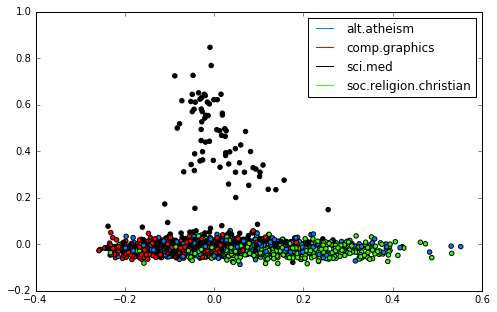

In [173]:
from common.visualize.colors import COLORS
scatter(X_train_tfidf_pca[:,0], X_train_tfidf_pca[:,1], c=[COLORS[y] for y in twenty_train.target])
for i,name in enumerate(twenty_train.target_names):
    plot([0,0],[0,0],c=COLORS[i],label=name)
legend()

* TruncatedSVD
* NMF
* LDA